In [8]:
#data loading
import pandas as pd
filename="/content/scorecard.csv"
a=pd.read_csv(str(filename))

print(a)

       rownames  unitid                                          inst_name  \
0             1  100654                           Alabama A & M University   
1             2  100663                University of Alabama at Birmingham   
2             3  100690                                 Amridge University   
3             4  100706                University of Alabama in Huntsville   
4             5  100724                           Alabama State University   
...         ...     ...                                                ...   
48440     48441  489812                      Pima Medical Institute-Dillon   
48441     48442  489830                  Arthur's Beauty College-Jonesboro   
48442     48443  489900  Palm Beach Academy of Health & Beauty-Distinct...   
48443     48444  489937                  Piedmont International University   
48444     48445  490009      Spartan College of Aeronautics and Technology   

      state_abbr  pred_degree_awarded_ipeds  year  earnings_med

In [9]:
##Checking for null values
a.isna().sum()

,0
rownames,0
unitid,0
inst_name,0
state_abbr,0
pred_degree_awarded_ipeds,0
year,0
earnings_med,15706
count_not_working,15801
count_working,14772


In [10]:
#Fill null columns
fillColumns={6,7,8}
for x in fillColumns:
    a[a.columns[x]]=a[a.columns[x]].fillna(0)

In [11]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
b=LabelEncoder()
target="earnings_med"

#transform string into int
transformColumns={2,3}
for x in transformColumns:
    a[a.columns[x]]=b.fit_transform(a[a.columns[x]])

print(a)

       rownames  unitid  inst_name  state_abbr  pred_degree_awarded_ipeds  \
0             1  100654        102           1                          3   
1             2  100663       6449           1                          3   
2             3  100690        252           1                          3   
3             4  100706       6450           1                          3   
4             5  100724        105           1                          3   
...         ...     ...        ...         ...                        ...   
48440     48441  489812       4876          31                          1   
48441     48442  489830        377           2                          1   
48442     48443  489900       4697          10                          1   
48443     48444  489937       4860          32                          3   
48444     48445  490009       5814           6                          2   

       year  earnings_med  count_not_working  count_working  
0      2007  

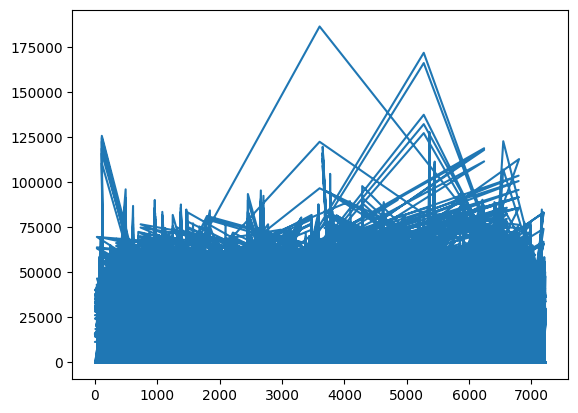

In [12]:
from matplotlib import pyplot as plt

index=2
plt.plot(a[a.columns[index]],a[str(target)])

<BarContainer object of 48445 artists>

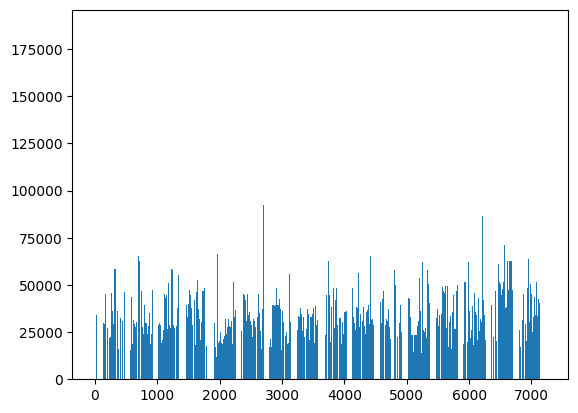

In [13]:
plt.bar(a[a.columns[2]],a[str(target)])

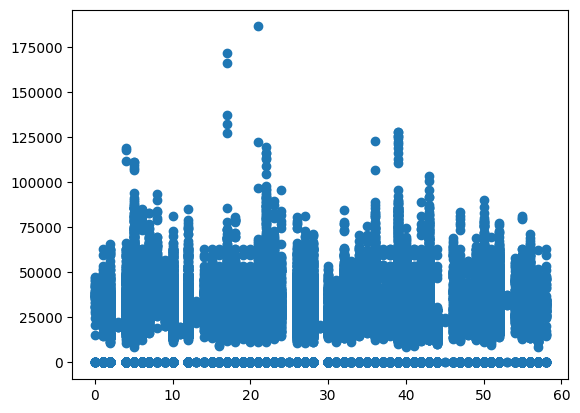

In [14]:
plt.scatter(a[a.columns[3]], a[str(target)])

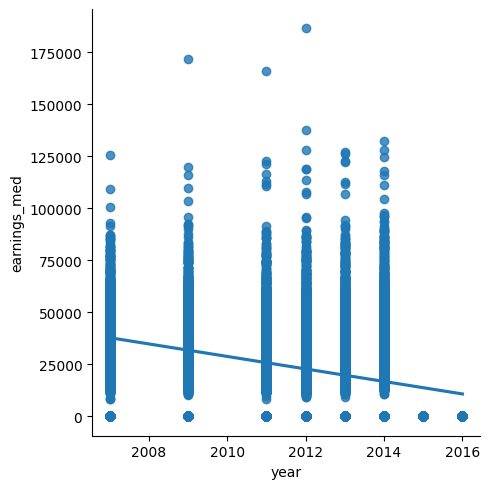

In [16]:
import seaborn as sns
#a["Purpose"] = pd.to_numeric(a["Purpose"])
#a["Count"] = pd.to_numeric(a["Count"])
sns.lmplot(x="year",y=str(target),data=a)

<Axes: xlabel='pred_degree_awarded_ipeds', ylabel='earnings_med'>

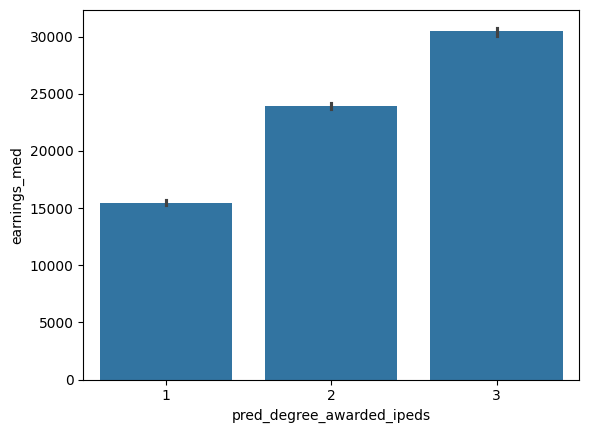

In [17]:
sns.barplot(x=a.columns[4],y=str(target),data=a)

<Axes: xlabel='count_not_working', ylabel='earnings_med'>

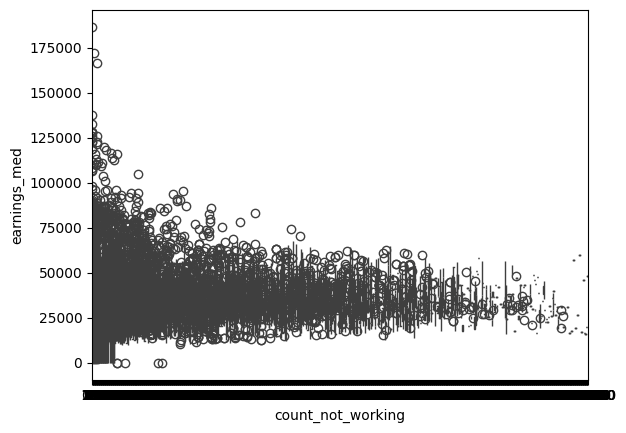

In [19]:
sns.boxplot(x=a.columns[7],y=str(target),data=a)

<ipython-input-20-61a72522baee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='earnings_med', ylabel='Density'>

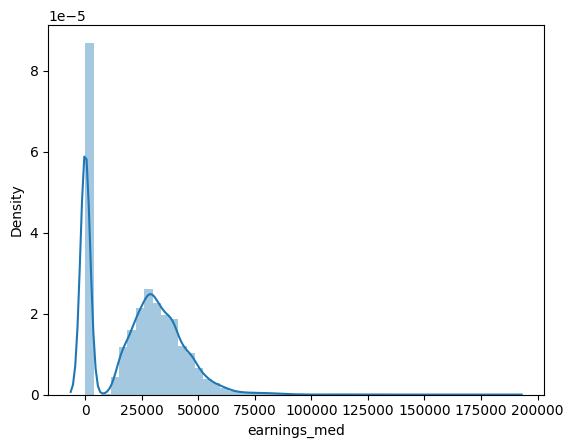

In [20]:
sns.distplot(a[str(target)])

<Axes: xlabel='state_abbr', ylabel='Density'>

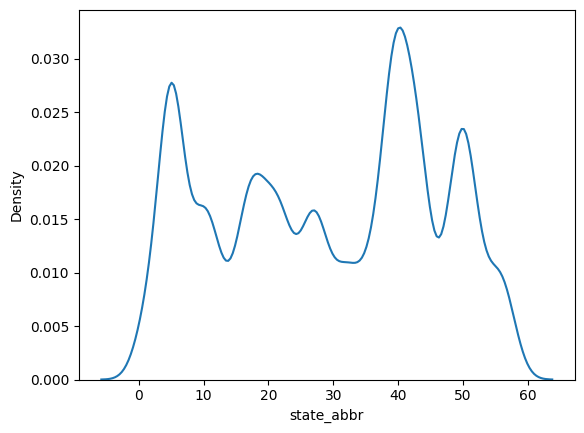

In [22]:
sns.kdeplot(a[a.columns[3]])

<Axes: xlabel='inst_name', ylabel='count'>

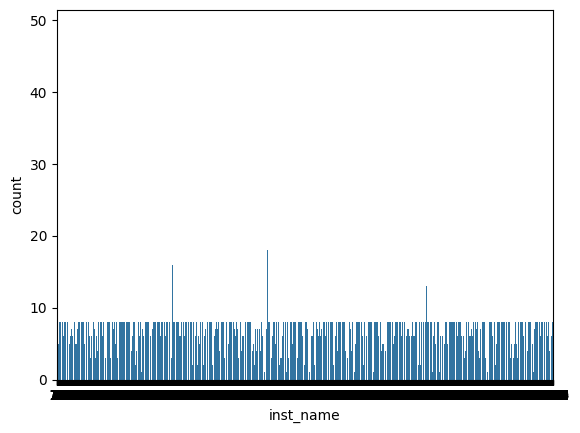

In [23]:
sns.countplot(x=a.columns[2],data=a)

<Axes: >

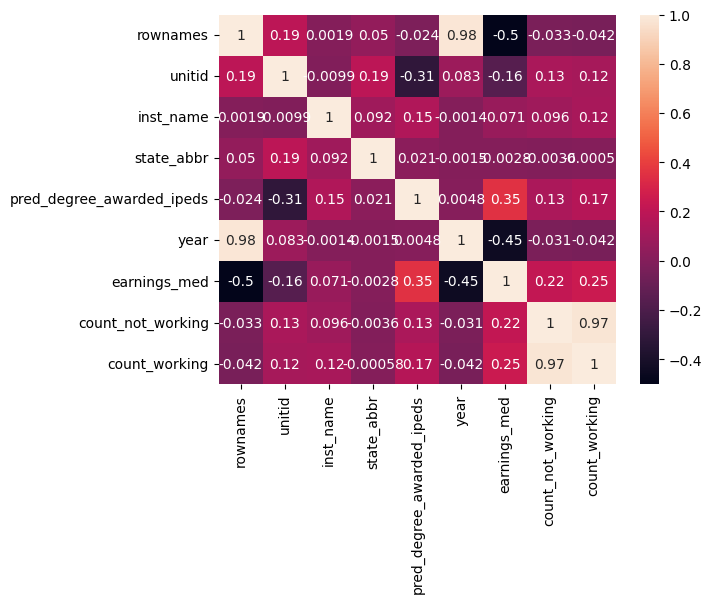

In [24]:
#data=a.select_dtypes(include=np.number).corr()
data=a.corr()

sns.heatmap(data, annot=True)

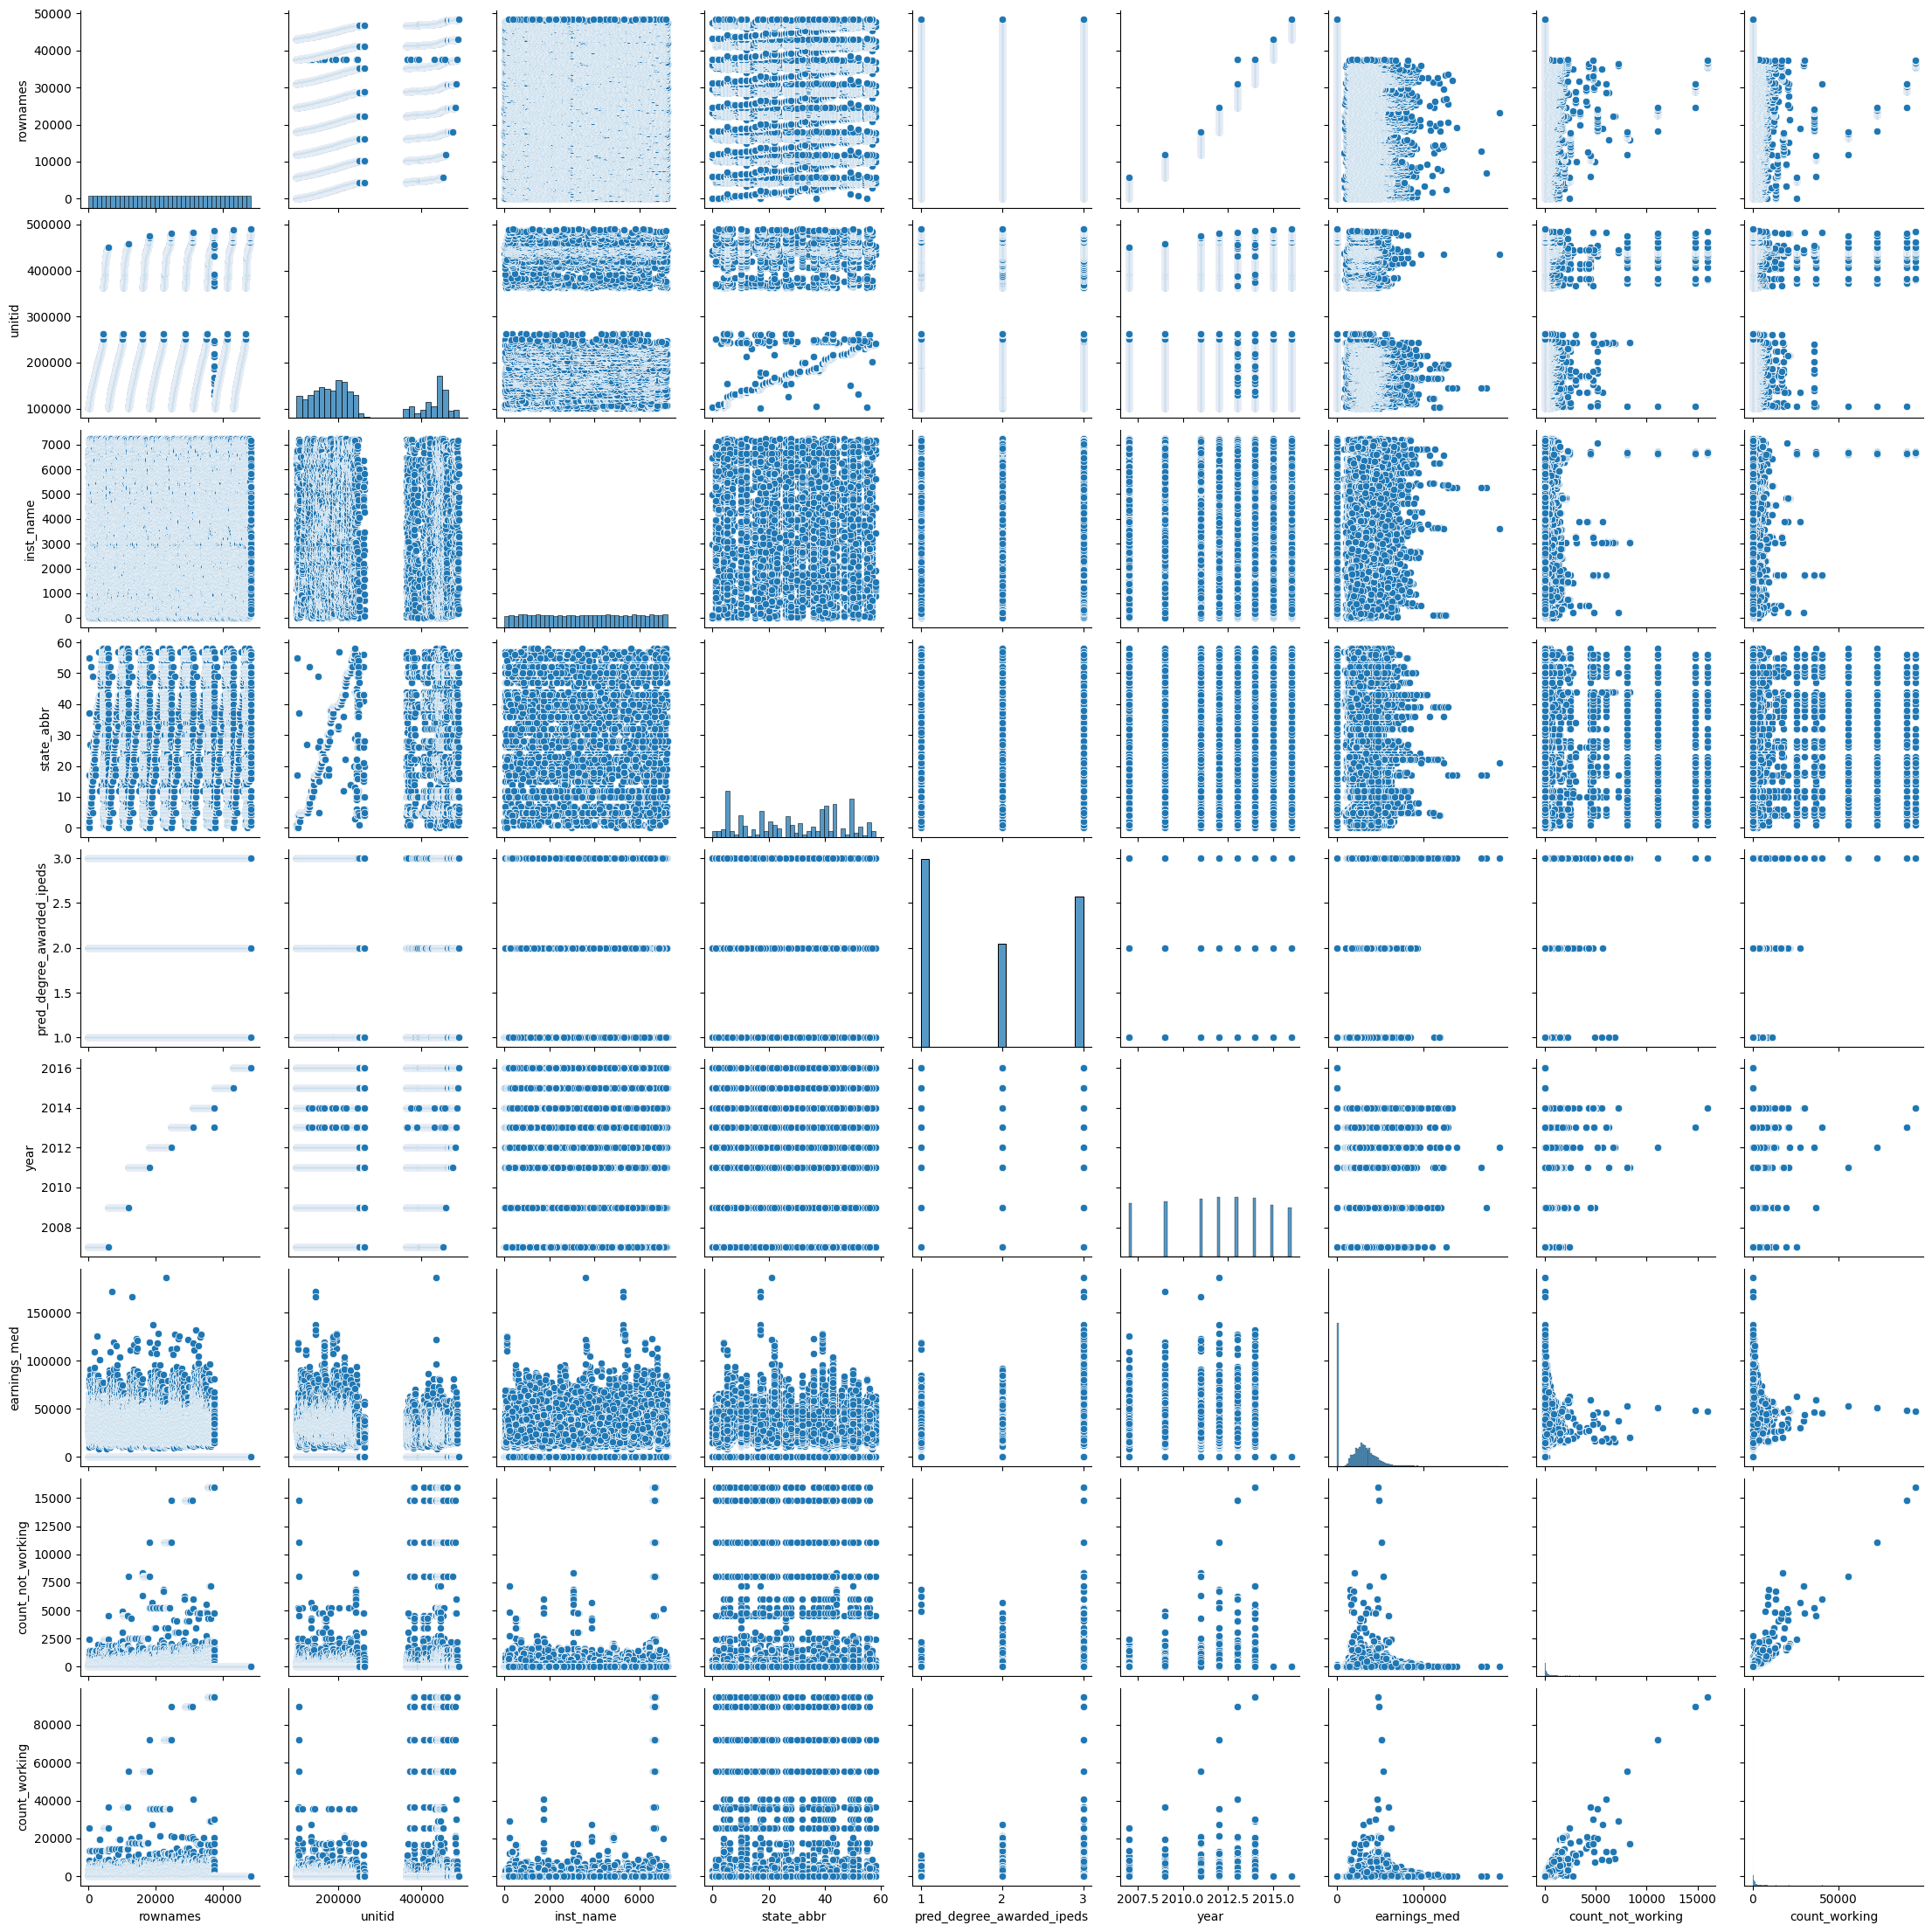

In [25]:
sns.pairplot(data=a)

In [26]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

       rownames  unitid  inst_name  state_abbr  pred_degree_awarded_ipeds  \
0             1  100654        102           1                          3   
1             2  100663       6449           1                          3   
2             3  100690        252           1                          3   
3             4  100706       6450           1                          3   
4             5  100724        105           1                          3   
...         ...     ...        ...         ...                        ...   
48440     48441  489812       4876          31                          1   
48441     48442  489830        377           2                          1   
48442     48443  489900       4697          10                          1   
48443     48444  489937       4860          32                          3   
48444     48445  490009       5814           6                          2   

       year  count_not_working  count_working  
0      2007              11

In [27]:
print(y)

0        36600.0
1        40800.0
2            0.0
3        49300.0
4        30500.0
          ...   
48440        0.0
48441        0.0
48442        0.0
48443        0.0
48444        0.0
Name: earnings_med, Length: 48445, dtype: float64


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [29]:
print(x_train)

       rownames  unitid  inst_name  state_abbr  pred_degree_awarded_ipeds  \
3145       3146  208275        674          42                          2   
15644     15645  231536        675          52                          1   
41885     41886  439057        329          55                          3   
34054     34055  210483       3315          43                          2   
44342     44343  159373       3602          21                          3   
...         ...     ...        ...         ...                        ...   
31021     31022  481906       5290          57                          1   
11856     11857  101295       2445           1                          2   
36613     36614  449153       1781          44                          1   
5736       5737  448752       1448           6                          2   
48299     48300  482486       1723          18                          3   

       year  count_not_working  count_working  
3145   2007               5

In [30]:
print(y_train)

3145     31300.0
15644    31700.0
41885        0.0
34054    21000.0
44342        0.0
          ...   
31021    23600.0
11856    27800.0
36613    17400.0
5736     40100.0
48299        0.0
Name: earnings_med, Length: 38756, dtype: float64


In [31]:
print(x_test)

       rownames  unitid  inst_name  state_abbr  pred_degree_awarded_ipeds  \
5817       5818  450553       6861          50                          1   
27205     27206  199582       5383          32                          3   
7318       7319  158778        471          21                          1   
6127       6128  112312       1342           5                          3   
8929       8930  207856       5797          41                          3   
...         ...     ...        ...         ...                        ...   
18430     18431  115083       2508           5                          3   
35677     35678  413617       1418          56                          2   
36053     36054  437769       1275          52                          1   
30249     30250  448734        315           6                          3   
46709     46710  260965       1935          17                          1   

       year  count_not_working  count_working  
5817   2007               4

In [32]:
print(y_test)

5817     34200.0
27205    25100.0
7318         0.0
6127     29300.0
8929     29200.0
          ...   
18430    65600.0
35677    20000.0
36053    30000.0
30249    37800.0
46709        0.0
Name: earnings_med, Length: 9689, dtype: float64


In [33]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

In [34]:
print(ypred)

[22018.7026951  29037.63020313 26588.65104599 ...  9698.61746828
 25819.10603197 -3470.05652524]


In [36]:
print(model.predict([[5818,450553,6861,50,1,2007,46.0,309.0]]))

[22018.7026951]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [37]:
from sklearn.tree import DecisionTreeRegressor
b=DecisionTreeRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [38]:
print(ypred)

[34200. 27300.     0. ... 29400. 37800.     0.]


In [40]:
print(model.predict([[5818,450553,6861,50,1,2007,46.0,309.0]]))

[22018.7026951]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [41]:
from sklearn.ensemble import RandomForestRegressor
b=RandomForestRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [42]:
print(ypred)

[32998. 37264.     0. ... 28875. 37800.     0.]


In [43]:
print(model.predict([[5818,450553,6861,50,1,2007,46.0,309.0]]))

[22018.7026951]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
